<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Function annotation



# What are function annotations?
<hr style = "border:2px solid black" ></hr>


- Before we start keep in mind that:
    - **Static typed** — performs type checking at compile-time and requires datatype declarations.
    - **Dynamic typed** — performs type checking at runtime and does not require datatype declarations.
- Function annotations are covered in PEP 3107 and they allow you to attach a metadata string to various types of object.
- They are generally used to attach metadata to functions describing their parameters and return values.
- The symbol `->` marks the return function annotation.
- The main way to add type hints is using annotations.
    


# Difference btw type hinting and annotation?
<hr style = "border:2px solid black" ></hr>


- In Python, type hinting and annotations are similar concepts that are used to indicate the types of variables or the return types of functions. However, there is a **subtle difference** between the two.
    - **Type hinting** refers to the practice of indicating the type of a variable or the return type of a function using the `->` syntax
    - **Annotations**, on the other hand, refer to the use of the `:` symbol. 



# Example #1
<hr style = "border:2px solid black" ></hr>

In [2]:
def kinetic_energy(m: 'in KG', v: 'in M/S') -> 'Joules':
    return 1/2*m*v**2

In [3]:
kinetic_energy

<function __main__.kinetic_energy(m: 'in KG', v: 'in M/S') -> 'Joules'>

In [5]:
dir(kinetic_energy)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [4]:
kinetic_energy.__annotations__

{'m': 'in KG', 'v': 'in M/S', 'return': 'Joules'}


- Annotations are dictionaries, so you can do this 



In [3]:
'{:,} {}'.format(kinetic_energy(12, 30),
                 kinetic_energy.__annotations__['return'])

'5,400.0 Joules'

# Example #2
<hr style = "border:2px solid black" ></hr>


- You can also have a python data structure rather than just a string:



In [4]:
rd = {'type': float, 'units': 'Joules',
      'docstring': 'Given mass and velocity returns kinetic energy in Joules'}


def f() -> rd:
    pass

In [5]:
f.__annotations__['return']['type']

float

In [6]:
f.__annotations__['return']['units']

'Joules'

In [7]:
f.__annotations__['return']['docstring']

'Given mass and velocity returns kinetic energy in Joules'

# Example #3
<hr style = "border:2px solid black" ></hr>


- You can use function attributes to validate called values:



In [1]:
def validate(func, locals):
    for var, test in func.__annotations__.items():
        value = locals[var]
        try:
            pr = test.__name__+': '+test.__docstring__
        except AttributeError:
            pr = test.__name__
        msg = '{}=={}; Test: {}'.format(var, value, pr)
        assert test(value), msg


def between(lo, hi):
    def _between(x):
        return lo <= x <= hi
    _between.__docstring__ = 'must be between {} and {}'.format(lo, hi)
    return _between


def f(x: between(3, 10), y: lambda _y: isinstance(_y, int)):
    validate(f, locals())
    print(x, y)

In [2]:
f(2,2)

AssertionError: x==2; Test: _between: must be between 3 and 10

In [3]:
f(3,2.1)

AssertionError: y==2.1; Test: <lambda>

# Example #4
<hr style = "border:2px solid black" ></hr>

In [4]:
import math

def circumference(radius: float) -> float:
    return 2 * math.pi * radius

In [5]:
circumference.__annotations__

{'radius': float, 'return': float}

# Example #5
<hr style = "border:2px solid black" ></hr>


- Now, if we were to enter an incorrect arguments, what would happen?
- In reality, nothing of significance — remember, Python does not enforce our type annotations.
- Instead, they are used by third-party IDEs and linters. So, an erroneous annotation will be highlighted by our third-party tool — acting as an early warning system that our logic isn’t quite right.



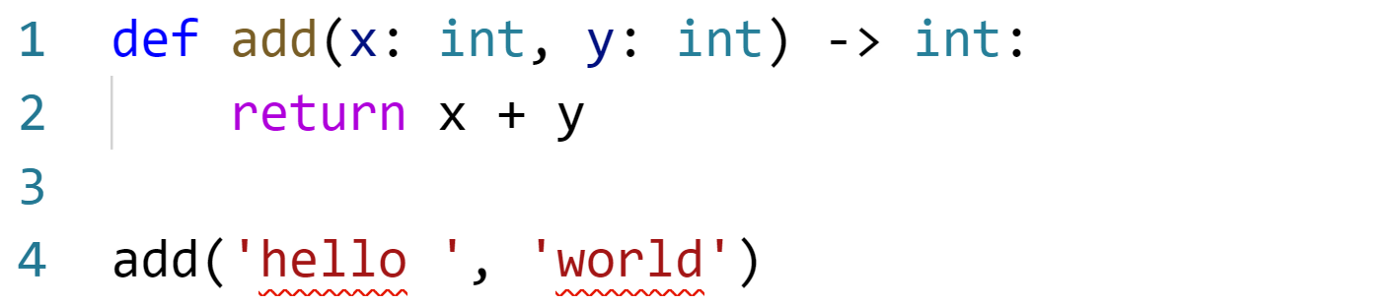

In [9]:
def add(x: int, y: int) -> int:
    return x + y

In [10]:
add(7, 4)

11

In [11]:
add("7", "4")

'74'

# Example of various annotations
<hr style = "border:2px solid black" ></hr>

## `Union` and `|`

- Allow a set of different types for a single assignment.

In [15]:
from typing import Union
def add(x: Union[int, float], y: Union[int, float]) -> Union[int, float]:
    return x + y

In [16]:
# Available from python 3.10
def add(x: int | float, y: int | float) -> int | float:
    return x + y

TypeError: unsupported operand type(s) for |: 'type' and 'type'

## `Optional`

- When we define a function with optional parameters, we can specify this using the Optional type. 

# List vs. `list` in type hinting
<hr style = "border:2px solid black" ></hr>


- In Python, List and list both refer to the built-in list class, but there is a difference in how they are used.
- `List` is used as a type hint to indicate that the function returns a list. Type hints were introduced in Python 3.5 and are used to indicate the type of a variable or the return type of a function. They are optional and do not affect the execution of the code. It is used to make the code more readable and also for the tools like IDEs, linters, type checkers etc to provide better suggestions, error messages etc.
- `list` is used as a return type of the function, it means that the function should return an object of the built-in list class.
    


In [8]:
from typing import List
def a() -> List:
    return [1, 2, 3]
a

<function __main__.a() -> List>

In [9]:
def a() -> list:
    return [1, 2, 3]
a

<function __main__.a() -> list>

# References
<hr style = "border:2px solid black" ></hr>


- https://stackoverflow.com/questions/14379753/what-does-mean-in-python-function-definitions
- https://www.python.org/dev/peps/pep-3107/
- https://realpython.com/lessons/annotations/
- https://towardsdatascience.com/type-annotations-in-python-d90990b172dc
- [Type hints cheatsheet 1](https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html)
- [type hints cheatsheet 2](https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html)
    


# Requirements
<hr style = "border:2px solid black" ></hr>

In [2]:
%load_ext watermark
%watermark -v -iv -m

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

json    : 2.0.9
numpy   : 1.21.6
autopep8: 1.6.0

